<a href="https://colab.research.google.com/github/Himangi-77/excelR-assignments/blob/main/ASSIGNMENT11_AMAZONREVIEWS_EMOTIONMINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
import nltk
from nltk import tokenize

In [10]:
reviews = pd.read_csv('/content/Samsung.txt', error_bad_lines=False, names=['Reviews'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
reviews

,Reviews
0,Camera quality is best. Battery goes 2 days on...
1,"It's a good product which is made by Samsung, ..."
2,* Display: Though just TFT but feels much bett...
3,Handset's performances fine.. but speed of cha...
4,Its good quality phone but travel adapter is n...
5,"It hasn't amoled display. Its fast, camera qua..."
6,Complaint of problem in mobile: (1) No voice i...
7,"Marvelous mobile, but not giving charger with ..."
8,Camera quality is good at this price segment b...


In [15]:
nlp = spacy.load('en_core_web_sm')

In [17]:
one_review = reviews[0]
doc = nlp(one_review)
spacy.displacy.render(doc,style='ent',jupyter=True)

In [18]:
for token in doc:
  print(token, ' | ', token.pos_)

Camera  |  NOUN
quality  |  NOUN
is  |  AUX
best  |  ADJ
.  |  PUNCT
Battery  |  NOUN
goes  |  VERB
2  |  NUM
days  |  NOUN
on  |  ADP
normal  |  ADJ
use  |  NOUN
.  |  PUNCT
Phone  |  NOUN
is  |  AUX
sometimes  |  ADV
auto  |  NOUN
unlock  |  NOUN
saying  |  VERB
fingerprint  |  NOUN
reader  |  NOUN
is  |  AUX
dirty  |  ADJ
.  |  PUNCT
4  |  NUM
g  |  NOUN
data  |  NOUN
is  |  AUX
quickly  |  ADV
finished  |  VERB
in  |  ADP
comparison  |  NOUN
to  |  ADP
4  |  NUM
g  |  NOUN
mobile  |  ADJ
phone  |  NOUN
.  |  PUNCT
It  |  PRON
's  |  AUX
not  |  PART
that  |  ADV
much  |  ADJ
overweight  |  NOUN
to  |  PART
use  |  VERB
in  |  ADP
one  |  NUM
hand  |  NOUN
.  |  PUNCT
Overall  |  ADV
It  |  PRON
's  |  AUX
a  |  DET
good  |  ADJ
phone  |  NOUN
at  |  ADP
this  |  DET
price  |  NOUN

  |  SPACE
One  |  NUM
person  |  NOUN
found  |  VERB
this  |  DET
helpful  |  ADJ


In [24]:
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[0:5]

['Camera quality is best.',
 'Battery goes 2 days on normal use.',
 'Phone is sometimes auto unlock saying fingerprint reader is dirty.',
 '4g data is quickly finished in comparison to 4g mobile phone.',
 "It's not that much overweight to use in one hand ."]

In [26]:
sent_df = pd.DataFrame(sentences,columns=['sentences'])
sent_df

,sentences
0,Camera quality is best.
1,Battery goes 2 days on normal use.
2,Phone is sometimes auto unlock saying fingerpr...
3,4g data is quickly finished in comparison to 4...
4,It's not that much overweight to use in one ha...
5,Overall It's a good phone at this price\r\nOne...
6,But the camera quality is good.
7,* Display: Though just TFT but feels much bett...
8,As of now it doesn't support HDR playback in Y...
9,* Performance: It has new and smaller chipset ...


In [27]:
#Sentiment Analysis
affin = pd.read_csv('/content/Afinn (1).csv', sep=',', encoding = 'latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [32]:
affin_scores = affin.set_index('word')['value'].to_dict()
affin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [36]:
spacy.load('en_core_web_sm')
sentiment_lexicon = affin_scores

def calculate_sentiment(text: str = None):
  sent_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_,0)
  return sent_score

In [38]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)

In [40]:
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df.word_count.head()

0     4
1     7
2    10
3    11
4    11
Name: word_count, dtype: int64

In [42]:
sent_df.sort_values(by='sentiment_value').head(5)

,sentences,sentiment_value,word_count
25,Complaint of problem in mobile: (1) No voice i...,-4,28
10,No lags on normal usage though.,-2,6
2,Phone is sometimes auto unlock saying fingerpr...,-2,10
26,"(2) If power off and start again, then communi...",-2,19
22,Other wise people will stop buying other compa...,-1,9


In [43]:
sent_df.sort_values(by='sentiment_value').head(5)

,sentences,sentiment_value,word_count
25,Complaint of problem in mobile: (1) No voice i...,-4,28
10,No lags on normal usage though.,-2,6
2,Phone is sometimes auto unlock saying fingerpr...,-2,10
26,"(2) If power off and start again, then communi...",-2,19
22,Other wise people will stop buying other compa...,-1,9


In [45]:
sent_df['sentiment_value'].describe()

count    30.000000
mean      1.066667
std       2.740920
min      -4.000000
25%       0.000000
50%       0.000000
75%       3.000000
max       7.000000
Name: sentiment_value, dtype: float64

In [47]:
sent_df[sent_df['sentiment_value']>=1]

,sentences,sentiment_value,word_count
0,Camera quality is best.,3,4
5,Overall It's a good phone at this price\r\nOne...,6,54
6,But the camera quality is good.,3,6
8,As of now it doesn't support HDR playback in Y...,2,17
11,* Camera: Main 50MP camera on rear is great co...,3,13
18,Handset's performances fine.. but speed of cha...,7,48
24,"Its fast, camera quality good, fingerprint rea...",6,11
27,Please solve this matter and return this mobile.,3,8
28,"Marvelous mobile, but not giving charger with ...",5,16
29,Camera quality is good at this price segment b...,6,21


In [49]:
sent_df['index'] = range(0,len(sent_df))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


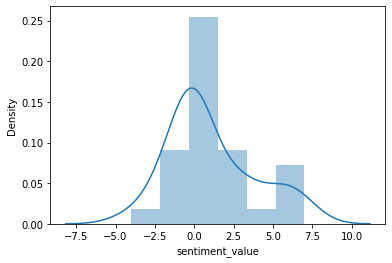

In [48]:
#Visualization
sns.distplot(sent_df['sentiment_value'])

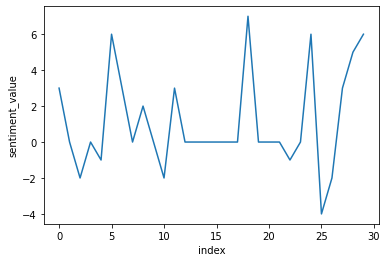

In [51]:
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

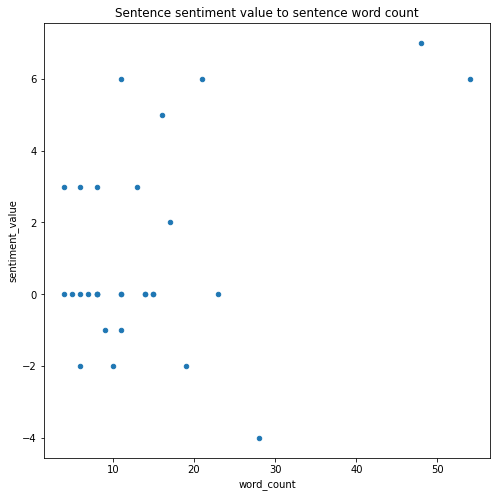

In [52]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')